# Intelligence Artificielle et Jeux (LU3IN025)

## Projet 1 : Problème des affectations, Algorithme de Gale Shapley

### Ben Kabongo 
Janvier 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import lib

plt.style.use('seaborn-whitegrid')

%load_ext autoreload
%autoreload 2

## 1. Problème et affectations

### 1.1. Préférences des étudiants et des spécialités

Récupérons la liste des préférences des étudiants et leurs noms.

In [2]:
prefEtu, namesEtu = lib.readPrefEtu()
prefEtu

array([[5, 7, 6, 8, 3, 2, 0, 1, 4],
       [6, 5, 0, 4, 7, 2, 8, 3, 1],
       [4, 0, 7, 2, 8, 3, 1, 6, 5],
       [6, 5, 7, 0, 8, 4, 3, 1, 2],
       [1, 6, 7, 5, 0, 2, 4, 8, 3],
       [0, 7, 4, 2, 8, 3, 1, 6, 5],
       [5, 7, 6, 2, 8, 3, 0, 1, 4],
       [7, 0, 4, 2, 8, 3, 1, 6, 5],
       [5, 7, 6, 2, 8, 3, 0, 1, 4],
       [2, 6, 5, 8, 3, 1, 4, 7, 0],
       [6, 4, 0, 8, 3, 1, 5, 2, 7]])

Récupérons la liste des préférences des spécialités, leurs noms et leurs capacités d'accueils.

In [3]:
prefSpe, namesSpe, capacities = lib.readPrefSpe()
prefSpe

array([[ 7,  9,  5,  4,  3,  1,  0, 10,  6,  8,  2],
       [ 7,  5,  9,  4,  3,  1,  0, 10,  8,  6,  2],
       [ 3,  9,  5,  4,  7,  6,  1,  0, 10,  8,  2],
       [ 7,  9,  5,  4,  3,  1,  0,  6, 10,  8,  2],
       [10,  3,  0,  4,  5,  6,  7,  8,  9,  1,  2],
       [ 1,  0,  3,  4,  5,  6,  7,  2,  9, 10,  8],
       [ 0,  1,  3,  4,  5,  6,  7,  2,  8, 10,  9],
       [ 7,  6,  9,  5,  4,  3,  1,  0, 10,  8,  2],
       [ 1,  0,  3,  4,  5,  6,  7,  2,  9, 10,  8]])

Affichons les préférences des étudiants avec pandas.

In [4]:
namedPrefEtu = np.array([[namesSpe[i] for i in pref] for pref in prefEtu])
prefEtu_df = pd.DataFrame(namedPrefEtu, index=namesEtu, columns=range(9))
prefEtu_df

,0,1,2,3,4,5,6,7,8
Etu0,SAR,SFPN,SESI,STL,IMA,DAC,ANDROIDE,BIM,RES
Etu1,SESI,SAR,ANDROIDE,RES,SFPN,DAC,STL,IMA,BIM
Etu2,RES,ANDROIDE,SFPN,DAC,STL,IMA,BIM,SESI,SAR
Etu3,SESI,SAR,SFPN,ANDROIDE,STL,RES,IMA,BIM,DAC
Etu4,BIM,SESI,SFPN,SAR,ANDROIDE,DAC,RES,STL,IMA
Etu5,ANDROIDE,SFPN,RES,DAC,STL,IMA,BIM,SESI,SAR
Etu6,SAR,SFPN,SESI,DAC,STL,IMA,ANDROIDE,BIM,RES
Etu7,SFPN,ANDROIDE,RES,DAC,STL,IMA,BIM,SESI,SAR
Etu8,SAR,SFPN,SESI,DAC,STL,IMA,ANDROIDE,BIM,RES
Etu9,DAC,SESI,SAR,STL,IMA,BIM,RES,SFPN,ANDROIDE


Affichons les préférences des spécialités avec pandas.

In [5]:
namedPrefSpe = np.array([[namesEtu[i] for i in pref] for pref in prefSpe])
prefSpe_df = pd.DataFrame(namedPrefSpe, index=namesSpe, columns=range(len(prefEtu)))
prefSpe_df

,0,1,2,3,4,5,6,7,8,9,10
ANDROIDE,Etu7,Etu9,Etu5,Etu4,Etu3,Etu1,Etu0,Etu10,Etu6,Etu8,Etu2
BIM,Etu7,Etu5,Etu9,Etu4,Etu3,Etu1,Etu0,Etu10,Etu8,Etu6,Etu2
DAC,Etu3,Etu9,Etu5,Etu4,Etu7,Etu6,Etu1,Etu0,Etu10,Etu8,Etu2
IMA,Etu7,Etu9,Etu5,Etu4,Etu3,Etu1,Etu0,Etu6,Etu10,Etu8,Etu2
RES,Etu10,Etu3,Etu0,Etu4,Etu5,Etu6,Etu7,Etu8,Etu9,Etu1,Etu2
SAR,Etu1,Etu0,Etu3,Etu4,Etu5,Etu6,Etu7,Etu2,Etu9,Etu10,Etu8
SESI,Etu0,Etu1,Etu3,Etu4,Etu5,Etu6,Etu7,Etu2,Etu8,Etu10,Etu9
SFPN,Etu7,Etu6,Etu9,Etu5,Etu4,Etu3,Etu1,Etu0,Etu10,Etu8,Etu2
STL,Etu1,Etu0,Etu3,Etu4,Etu5,Etu6,Etu7,Etu2,Etu9,Etu10,Etu8


Affichons les capacités des spécialités.

In [6]:
capacities_df = pd.DataFrame({"Spécialité":namesSpe, "Capacité":capacities})
capacities_df

,Spécialité,Capacité
0,ANDROIDE,2
1,BIM,1
2,DAC,1
3,IMA,1
4,RES,1
5,SAR,1
6,SESI,1
7,SFPN,1
8,STL,2


### 1.2. Gale Shapley côté étudiant

Appliquons l'algorithme de Gale-Shapley côté étudiant et affichons les résultats.

In [7]:
etuCouples = lib.etuGaleShapley(prefEtu, prefSpe, capacities)
namedEtuCouples = lib.getNamedCouples(etuCouples, namesEtu, namesSpe)
etuCouples

array([[ 0,  5],
       [ 1,  6],
       [ 2,  8],
       [ 3,  0],
       [ 4,  1],
       [ 5,  0],
       [ 6,  8],
       [ 7,  7],
       [ 8,  3],
       [ 9,  2],
       [10,  4]])

In [8]:
etuCouples_df = pd.DataFrame(namedEtuCouples, columns=["Etudiants", "Spécialité"])
etuCouples_df

,Etudiants,Spécialité
0,Etu0,SAR
1,Etu1,SESI
2,Etu2,STL
3,Etu3,ANDROIDE
4,Etu4,BIM
5,Etu5,ANDROIDE
6,Etu6,STL
7,Etu7,SFPN
8,Etu8,IMA
9,Etu9,DAC


### 1.3. Gale Shapley côté spécialité

Appliquons l'algorithme de Gale-Shapley côté spécialité et affichons les résultats.

In [9]:
speCouples = lib.speGaleShapley(prefSpe, prefEtu, capacities)
namedSpeCouples = lib.getNamedCouples(speCouples, namesSpe, namesEtu)
speCouples

array([[ 0,  3],
       [ 0,  5],
       [ 1,  4],
       [ 2,  9],
       [ 3,  8],
       [ 4, 10],
       [ 5,  1],
       [ 6,  0],
       [ 7,  7],
       [ 8,  6],
       [ 8,  2]])

In [10]:
speCouples_df = pd.DataFrame(namedSpeCouples, columns=["Spécialité", "Etudiant"])
speCouples_df

,Spécialité,Etudiant
0,ANDROIDE,Etu3
1,ANDROIDE,Etu5
2,BIM,Etu4
3,DAC,Etu9
4,IMA,Etu8
5,RES,Etu10
6,SAR,Etu1
7,SESI,Etu0
8,SFPN,Etu7
9,STL,Etu6


### 1.4. Paires instables

Affichons toutes les paires instables du mariage obtenu côté étudiant.

In [11]:
etuUnstablePairs = lib.unstablePairs(etuCouples, prefEtu, prefSpe)
namedEtuUnstablePairs = lib.getNamedCouples(etuUnstablePairs, namesEtu, namesSpe)
etuUnstablePairs

array([], dtype=float64)

Aucune paire instable. Le mariage obtenu côté étudiant est donc parfait et stable.

Affichons toutes les paires instables du mariage obtenu côté spécialité.

In [12]:
speUnstablePairs = lib.unstablePairs(speCouples, prefSpe, prefEtu)
namedSpeUnstablePairs = lib.getNamedCouples(speUnstablePairs, namesSpe, namesEtu)
speUnstablePairs

array([], dtype=float64)

Aucune paire instable. Le mariage obtenu côté spécialité est donc parfait et stable.

## 2. Evolution du temps de calcul

### 2.1. Génération aléatoires des préférences et des capacités

Générons une matrice des préférences de 20 étudiants pour les 9 spécialités.

In [13]:
prefEtu20 = lib.generatePrefEtu(20)
prefEtu20

array([[8, 2, 1, 6, 4, 5, 7, 3, 0],
       [2, 0, 7, 5, 6, 8, 4, 3, 1],
       [4, 7, 8, 3, 1, 0, 2, 5, 6],
       [7, 3, 0, 4, 8, 5, 6, 1, 2],
       [7, 6, 4, 2, 3, 0, 8, 5, 1],
       [8, 4, 0, 2, 7, 6, 1, 5, 3],
       [4, 3, 7, 5, 8, 0, 1, 6, 2],
       [1, 3, 5, 0, 6, 2, 7, 4, 8],
       [3, 8, 7, 0, 1, 5, 2, 4, 6],
       [2, 1, 6, 0, 8, 7, 5, 3, 4],
       [1, 6, 0, 8, 4, 3, 2, 7, 5],
       [7, 5, 2, 4, 6, 1, 8, 3, 0],
       [3, 7, 0, 8, 1, 5, 2, 6, 4],
       [4, 0, 1, 8, 6, 5, 3, 2, 7],
       [8, 4, 2, 1, 3, 5, 6, 7, 0],
       [5, 0, 6, 4, 8, 2, 3, 1, 7],
       [7, 2, 0, 6, 4, 8, 5, 1, 3],
       [1, 6, 4, 8, 3, 5, 2, 0, 7],
       [3, 7, 1, 2, 5, 6, 0, 4, 8],
       [8, 5, 0, 1, 7, 4, 3, 6, 2]])

In [14]:
namedPrefEtu = np.array([[namesSpe[i] for i in pref] for pref in prefEtu20])
prefEtu_df = pd.DataFrame(namedPrefEtu, index=range(20), columns=range(9))
prefEtu_df

,0,1,2,3,4,5,6,7,8
0,STL,DAC,BIM,SESI,RES,SAR,SFPN,IMA,ANDROIDE
1,DAC,ANDROIDE,SFPN,SAR,SESI,STL,RES,IMA,BIM
2,RES,SFPN,STL,IMA,BIM,ANDROIDE,DAC,SAR,SESI
3,SFPN,IMA,ANDROIDE,RES,STL,SAR,SESI,BIM,DAC
4,SFPN,SESI,RES,DAC,IMA,ANDROIDE,STL,SAR,BIM
5,STL,RES,ANDROIDE,DAC,SFPN,SESI,BIM,SAR,IMA
6,RES,IMA,SFPN,SAR,STL,ANDROIDE,BIM,SESI,DAC
7,BIM,IMA,SAR,ANDROIDE,SESI,DAC,SFPN,RES,STL
8,IMA,STL,SFPN,ANDROIDE,BIM,SAR,DAC,RES,SESI
9,DAC,BIM,SESI,ANDROIDE,STL,SFPN,SAR,IMA,RES


Générons une matrice des préférences des 9 spécialités pour 20 étudiants.

In [15]:
prefSpe20 = lib.generatePrefSpe(20)
prefSpe20

array([[ 1, 15,  3,  7, 14,  2, 17, 19,  0,  4, 11,  6, 16, 10,  9, 12,
        13,  8,  5, 18],
       [19,  4, 11, 16, 10,  9,  2, 15,  8, 12,  3, 14,  1,  6, 18,  0,
        17,  5,  7, 13],
       [ 6,  0,  3,  4, 17, 14, 16,  1, 11,  2, 18,  5, 10, 19, 12, 13,
         8,  7,  9, 15],
       [ 1,  3, 11, 19, 15,  2,  8, 14,  0,  4, 10,  6, 13, 17,  5,  9,
         7, 16, 12, 18],
       [ 1, 15, 17,  3, 12,  6,  2,  5, 18, 13, 10,  4,  9, 19,  0, 14,
        11,  7, 16,  8],
       [ 3, 14, 11, 18,  0,  8,  4, 16, 17,  6,  2, 19, 12,  1, 10,  5,
         9, 13,  7, 15],
       [18,  9,  8,  2, 12, 16,  4,  5,  0,  1, 14, 15, 17, 10,  6, 13,
         7, 19, 11,  3],
       [13, 15, 16,  8,  7,  9,  3,  2,  0, 19, 11, 17,  6, 18,  1,  4,
        14, 10, 12,  5],
       [ 5, 15,  0, 10,  4,  8,  1, 19,  3,  6,  9, 18,  2, 17, 14, 13,
        16, 11, 12,  7]])

In [16]:
prefSpe_df = pd.DataFrame(prefSpe20, index=namesSpe, columns=range(20))
prefSpe_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ANDROIDE,1,15,3,7,14,2,17,19,0,4,11,6,16,10,9,12,13,8,5,18
BIM,19,4,11,16,10,9,2,15,8,12,3,14,1,6,18,0,17,5,7,13
DAC,6,0,3,4,17,14,16,1,11,2,18,5,10,19,12,13,8,7,9,15
IMA,1,3,11,19,15,2,8,14,0,4,10,6,13,17,5,9,7,16,12,18
RES,1,15,17,3,12,6,2,5,18,13,10,4,9,19,0,14,11,7,16,8
SAR,3,14,11,18,0,8,4,16,17,6,2,19,12,1,10,5,9,13,7,15
SESI,18,9,8,2,12,16,4,5,0,1,14,15,17,10,6,13,7,19,11,3
SFPN,13,15,16,8,7,9,3,2,0,19,11,17,6,18,1,4,14,10,12,5
STL,5,15,0,10,4,8,1,19,3,6,9,18,2,17,14,13,16,11,12,7


Générons un tableau de capacités pour 20 étudiants.

In [17]:
capacities20 = lib.generateCapacities(20)
print(capacities20, capacities20.sum())

[2 1 2 3 1 4 1 2 4] 20


In [18]:
capacities_df = pd.DataFrame({"Spécialité":namesSpe, "Capacité":capacities20})
capacities_df

,Spécialité,Capacité
0,ANDROIDE,2
1,BIM,1
2,DAC,2
3,IMA,3
4,RES,1
5,SAR,4
6,SESI,1
7,SFPN,2
8,STL,4


### 2.2. Mesures des temps d'exécution des algorithmes

Nous allons évaluer le temps d'exécution des deux algorithmes (côté étudiant et côté spécialité), en fonction de `n` le nombre d'étudiants.

Nous allons faire varier `n` de 200 à 2000 par pas de 200, et faire 10 tests pour chaque valeur de n. Nous afficherons ensuite graphiquement le temps moyen pour chacun des deux algorithmes en fonction des valeurs de n.

In [19]:
def plotTimes(start=200, end=2000, step=200, repeat=10):
    N, TEtu, TSpe = lib.getTimesStats(start, end, step, repeat)
    plt.title("Evolution du temps")
    plt.plot(N, TEtu, label="GS Etudiant")
    plt.plot(N, TSpe, label="GS Spécialité")
    plt.xlabel("Nombre d'étudiants")
    plt.ylabel("Temps d'exécution moyen (ms)")
    plt.legend()
    plt.show()
    
    plt.title("Evolution du temps")
    plt.plot(N, TEtu, label="GS Etudiant")
    plt.xlabel("Nombre d'étudiants")
    plt.ylabel("Temps d'exécution moyen (ms)")
    plt.legend()
    plt.show()
    
    plt.title("Evolution du temps")
    plt.plot(N, TSpe, label="GS Spécialité")
    plt.xlabel("Nombre d'étudiants")
    plt.ylabel("Temps d'exécution moyen (ms)")
    plt.legend()
    plt.show()

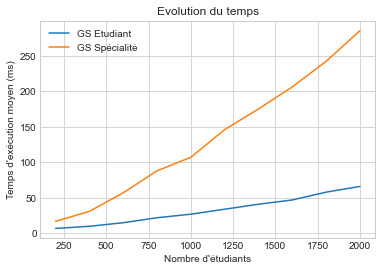

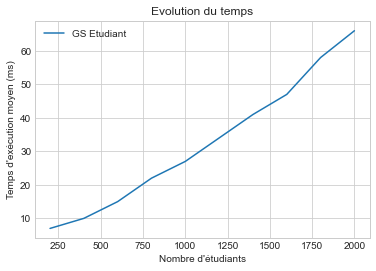

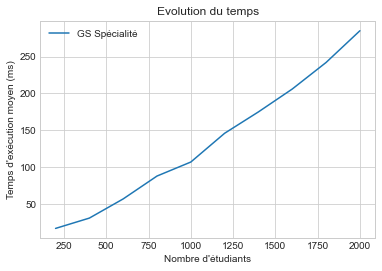

In [20]:
plotTimes()

Faisons varier `n` entre 200 et 5000 par pas de 200 et affichons les résultats.

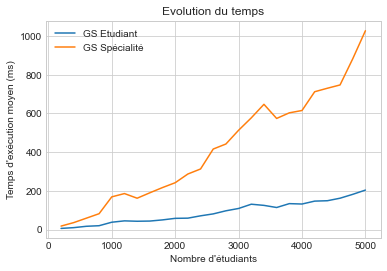

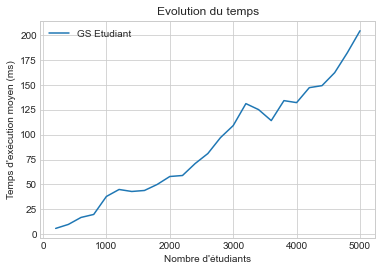

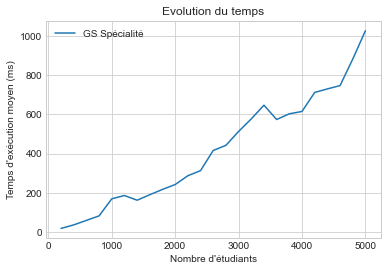

In [21]:
plotTimes(200, 5000, 200, 10)

### 2.4. Complexités

Les deux algorithmes sont de compléxité polynomiale.